# Evaluation of Deactivation Model

The deactivation model predicts whether an active user will deactivate in the next 365 days. This notebook shows the results of the last time this model was evaluated.

In [1]:
# Parameters
train_date = "2018-12-03"
today = "2019-12-04"


In [2]:
print('Model was last evaluated on:\n\t{}\n'.format(today))
print('At last evaluation, model was trained on data from:\n\t{}'.format(train_date))

Model was last evaluated on:
	2019-12-04

At last evaluation, model was trained on data from:
	2018-12-03


When interpreting the tables below, use the following class definitions:

+ **0** = Customer _**did not deactivate**_ in the 365 days after training
+ **1** = Customer _**deactivated**_ in the 365 days after training

Other notes:
+ Feature importances are scaled so they sum up to 1.
+ "AUC" refers to the Area Under the Curve. In charts with AUC listed, AUC can range from 0 to 1, with 1 meaning the model perfectly predicts deactivations. In the event that our model can't make perfect predictions, we would like AUC to be as high as possible, and it should _always_ be higher than the AUC for predicting deactivations at random.

# Results


TABLE 1: Predicted Class vs. Actual Class


,predicted_0,predicted_1,total
actual_0,609798,453914,1063712
actual_1,252274,1648345,1900619
total,862072,2102259,2964331



TABLE 2: Evaluation Metrics by Class (+ overall weighted average)


,N,precision,recall,f1,avgLogLoss,predOverActualN
0,1063712,0.707363,0.573274,0.633298,0.737665,0.810437
1,1900619,0.784083,0.867267,0.823580,0.341488,1.106092
weighted,2964331,0.756553,0.761772,0.755300,0.483651,1.000000



CHART 1:


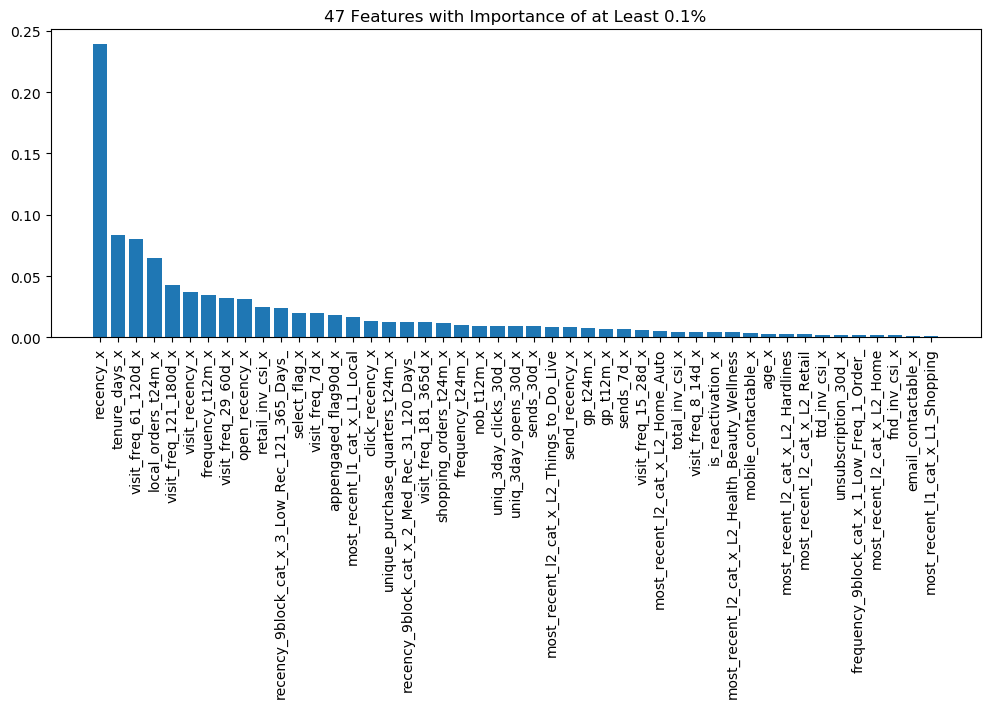


CHART 2:


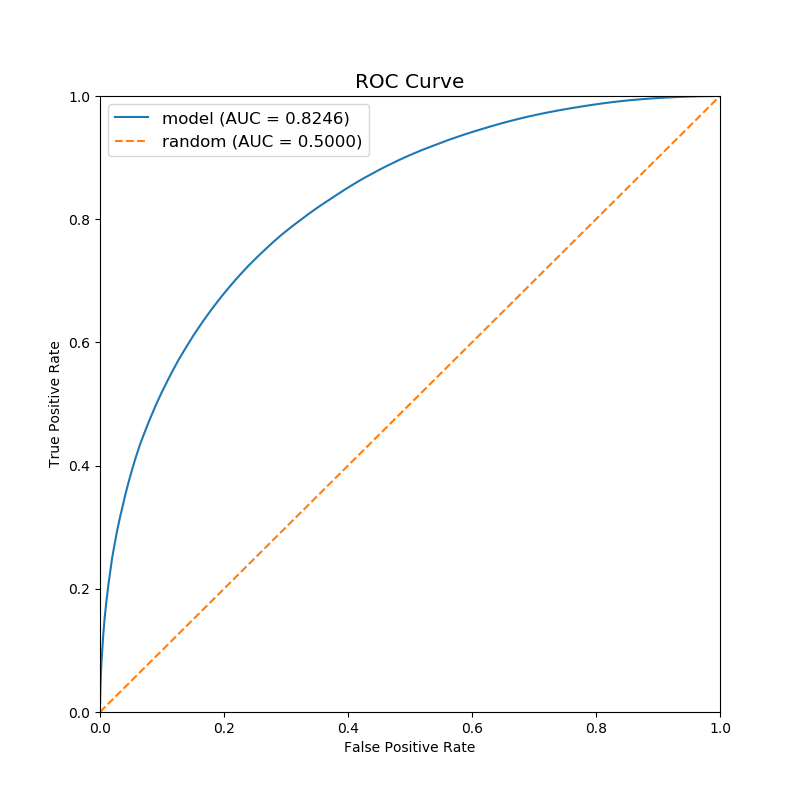


CHART 3:


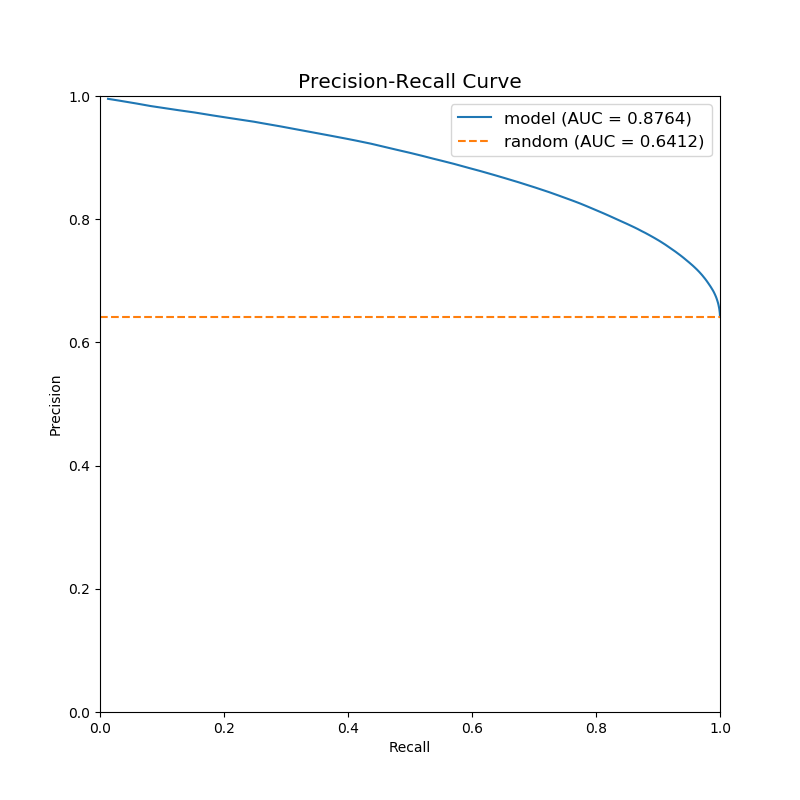


CHART 4:


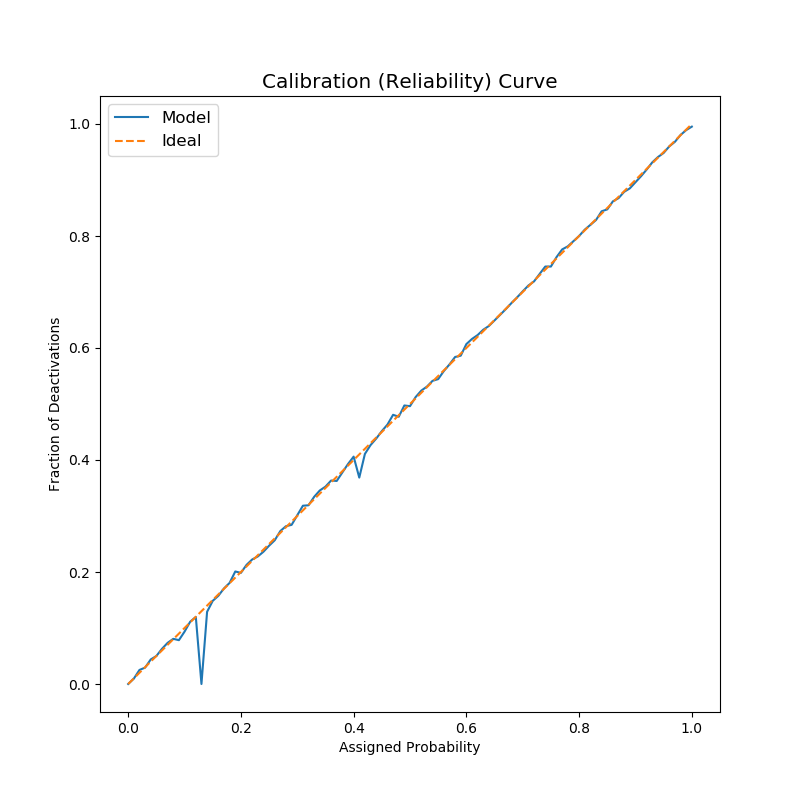


CHART 5:


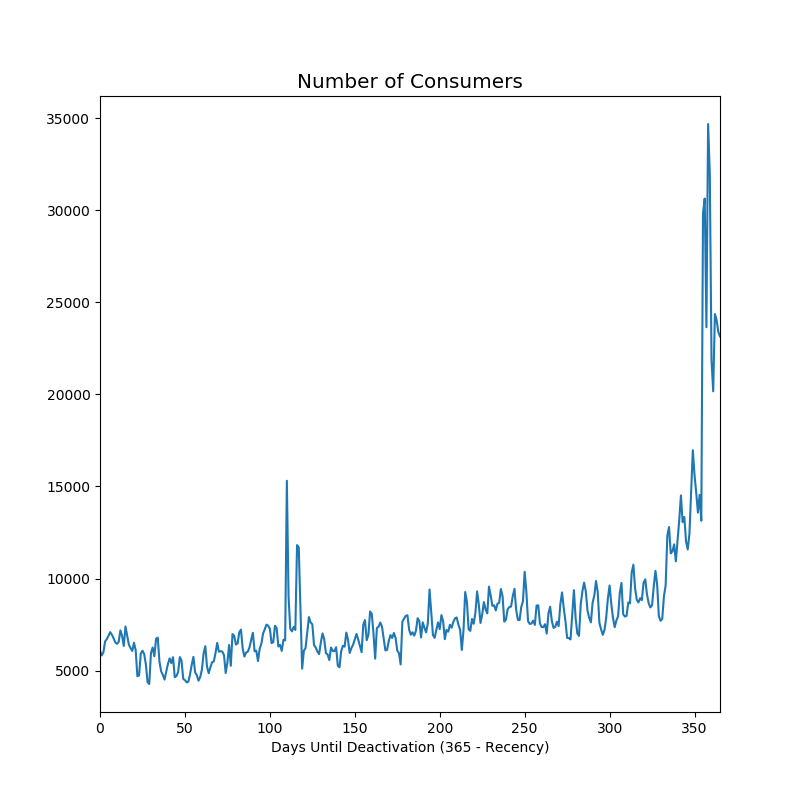


CHART 6:


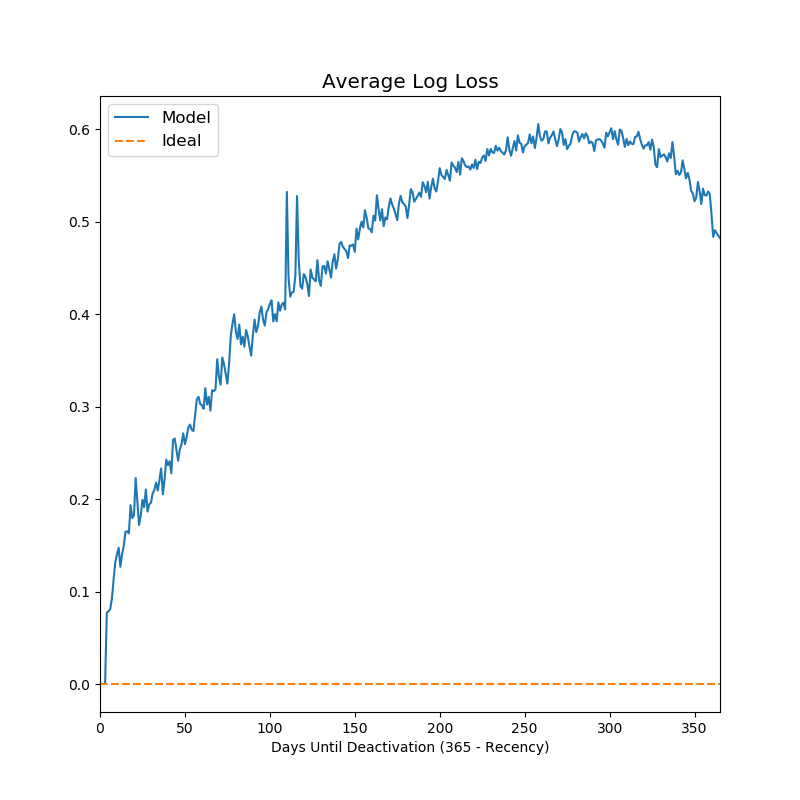


CHART 7:


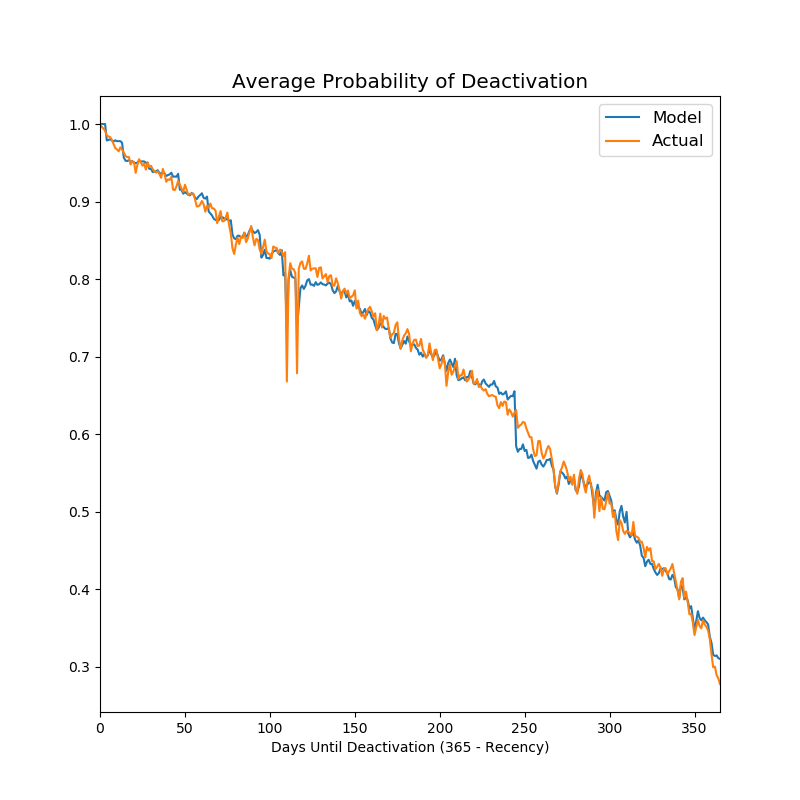


CHART 8:


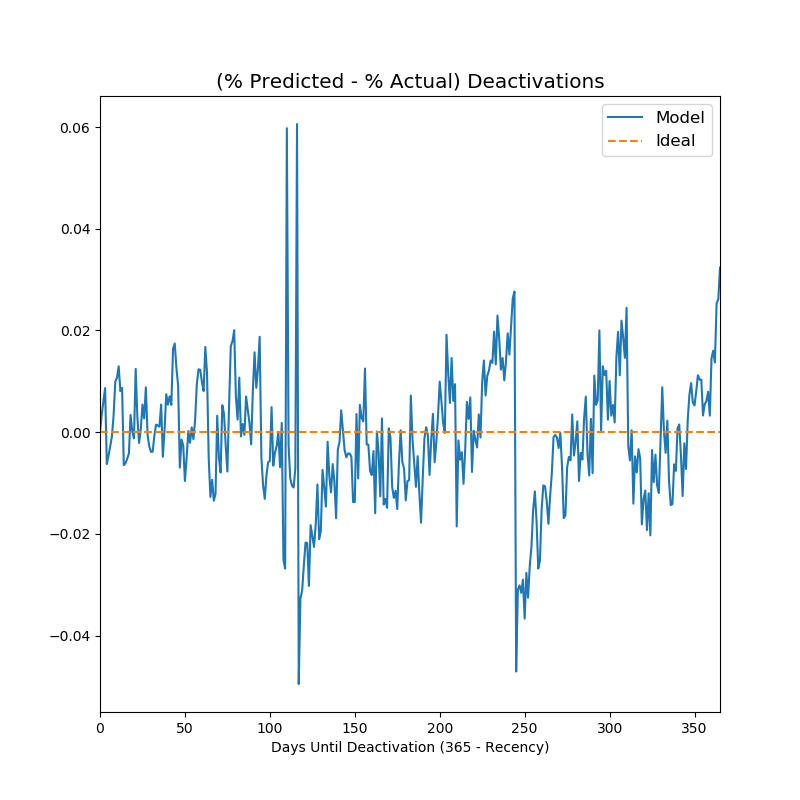


CHART 9:


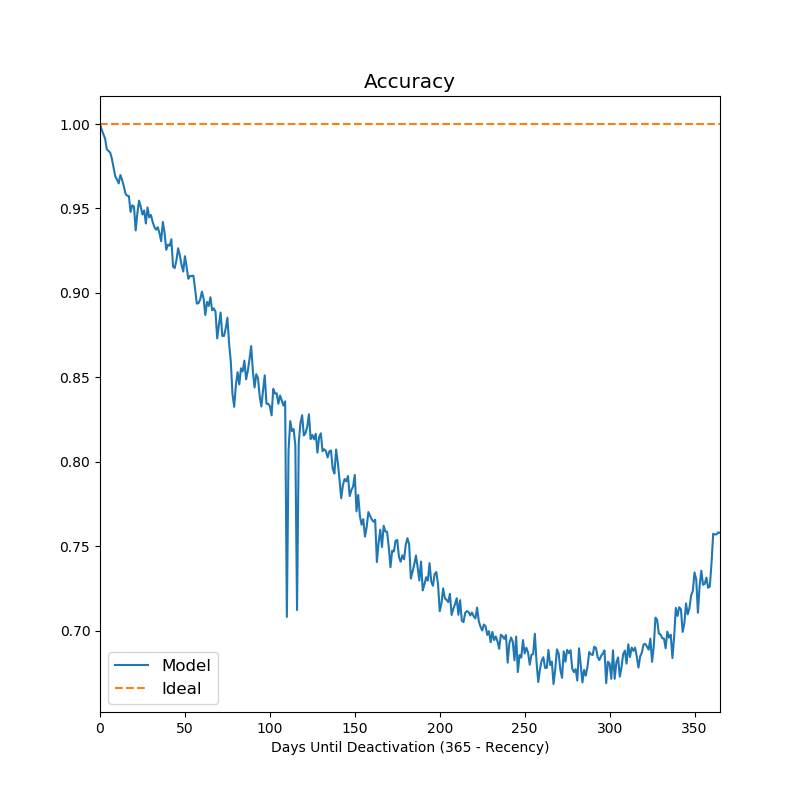

In [3]:
import pandas as pd
from IPython.display import display, Image

eval_folder = '/home/svc_clv/Consumer-Intelligence/Models/Deact-Model/model_evaluation/'

# Table 1
print('\nTABLE 1: Predicted Class vs. Actual Class')
counts = pd.read_csv(eval_folder+'prediction_matrix.tsv', sep='\t').set_index('Unnamed: 0')
del counts.index.name
display(counts)

# Table 2
print('\nTABLE 2: Evaluation Metrics by Class (+ overall weighted average)')
class_metrics = pd.read_csv(eval_folder+'class_metrics.tsv', sep='\t').set_index('class')
del class_metrics.index.name
display(class_metrics)

# Charts
charts = ['plot_feat_imp.png','plot_roc.png','plot_pr.png',\
          'plot_calibration.png','plot_count_users.png','plot_avg_log_loss.png',\
          'plot_avg_prob_deact.png','plot_diff_pct_deact.png','plot_accuracy.png']
for i, chart in enumerate(charts):
    print('\nCHART '+str(i+1)+':')
    display(Image(filename=eval_folder+chart))
